<a href="https://colab.research.google.com/github/sreekar-1726/DATA_ANALYTICS_PROJECT1/blob/main/Data_Analysis(HR_Analytics11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

In [95]:
CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'hr-analytics-job-change-of-data-scientists:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1019790%2F1719283%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240911%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240911T035629Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D067dff3284225f357743bb426d1dcbe48948a03f3995d07d3bdff7dcfb70683259ed0f29a8577f57fc6c940d03544a01cf62e43bc8e14491edac24d6caa1bc09c26dd2bc224e6fd74b44ea1975cd3cf7cc067b2954269677b316e2d992dcf7eafa66f268c42306be298228db53b765f655f5ad0f43cb337d0b8aa3d456863dbe7df218eaef624770ddac38e4521d009805077dedebccad4fb7853b15cc37affa7e0c29a2df3b7813d14cb13a3979ebfa75c9d0f83a883350ef93bd2ca6dd13dd111727aab44ac08f13ad0343974c2f5f50fdaf77f4eea4b21bbde1889cce54044a0b1afd3da323c0d65ae24e01876ec47d30b48bc3bc8536b9711ad34c520904'


In [96]:
KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

In [97]:
!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)


In [98]:
try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 301600 bytes downloaded
Downloaded and uncompressed: hr-analytics-job-change-of-data-scientists
Data source import complete.


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [100]:
df = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [102]:
df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [103]:
df.nunique()

,0
enrollee_id,19158
city,123
city_development_index,93
gender,3
relevent_experience,2
enrolled_university,3
education_level,5
major_discipline,6
experience,22
company_size,8


In [104]:
df.duplicated().sum()

0

* It has no duplicate record

In [105]:
df['city_development_index'].describe()

,city_development_index
count,19158.000000
mean,0.828848
std,0.123362
min,0.448000
25%,0.740000
50%,0.903000
75%,0.920000
max,0.949000


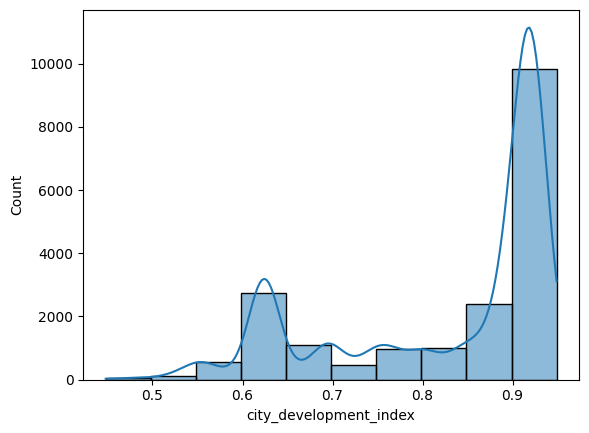

In [106]:
sns.histplot(df['city_development_index'],bins=10,kde=True)
plt.show()

* City development index has minimum value of 0.448000 and maximum value of 0.949000
* Mean of 0.828848 and Standard Deviation 0.123362

**Outliers**

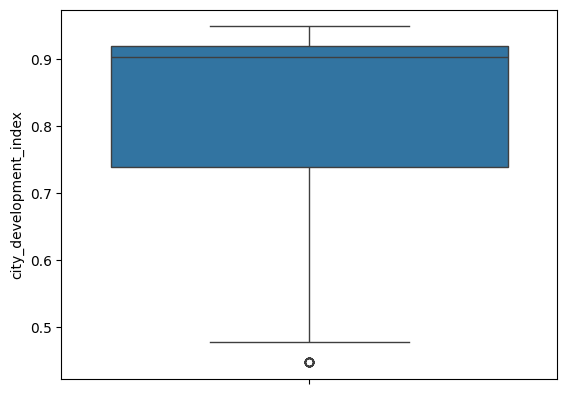

In [107]:
sns.boxplot(df['city_development_index'])
plt.show()

In [108]:
df['training_hours'].describe()

,training_hours
count,19158.000000
mean,65.366896
std,60.058462
min,1.000000
25%,23.000000
50%,47.000000
75%,88.000000
max,336.000000


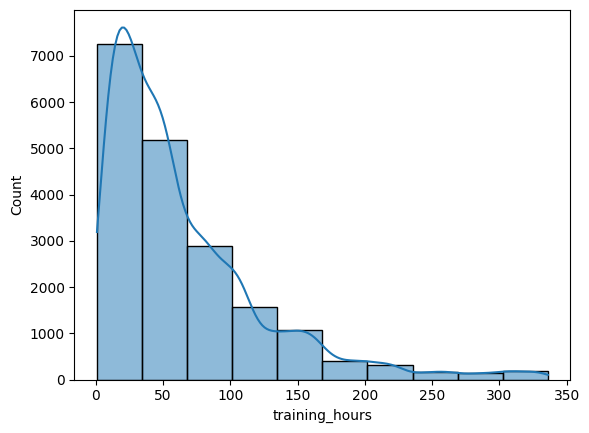

In [109]:
sns.histplot(df['training_hours'],bins=10,kde=True)
plt.show()

* Training Hours index has minimum value of 1 and maximum value of 336
* Mean of 65.366896 and Standard Deviation 60.058462

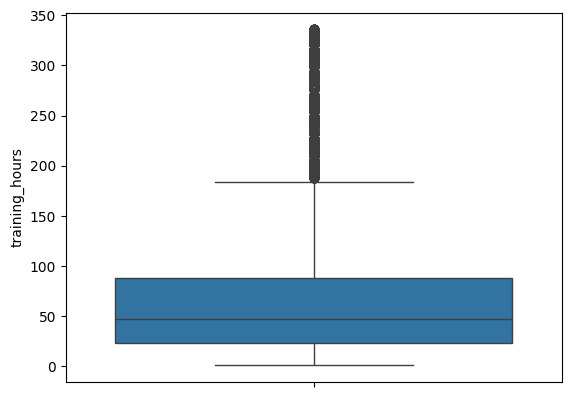

In [110]:
sns.boxplot(df['training_hours'])
plt.show()

In [111]:
df['target'].describe()

,target
count,19158.000000
mean,0.249348
std,0.432647
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


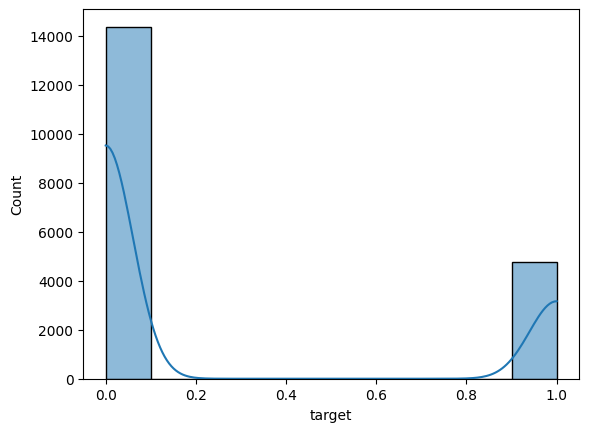

In [112]:
sns.histplot(df['target'],bins=10,kde=True)
plt.show()

* Target has minimum value of 0 and maximum value of 1
* Mean of 0.249348 and Standard Deviation 0.432647

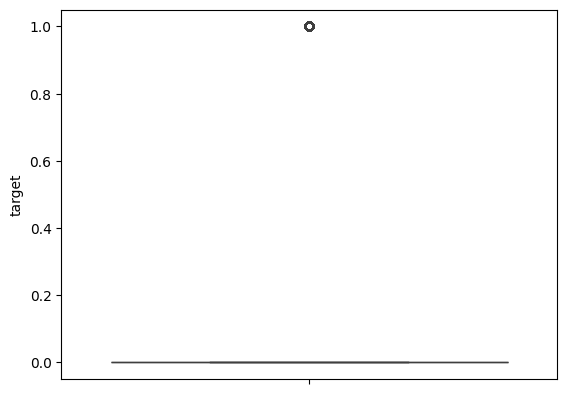

In [113]:
sns.boxplot(df['target'])
plt.show()

In [114]:
df.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [115]:
df['city'].value_counts()

,count
city,
city_103,4355
city_21,2702
city_16,1533
city_114,1336
city_160,845
...,...
city_129,3
city_111,3
city_121,3


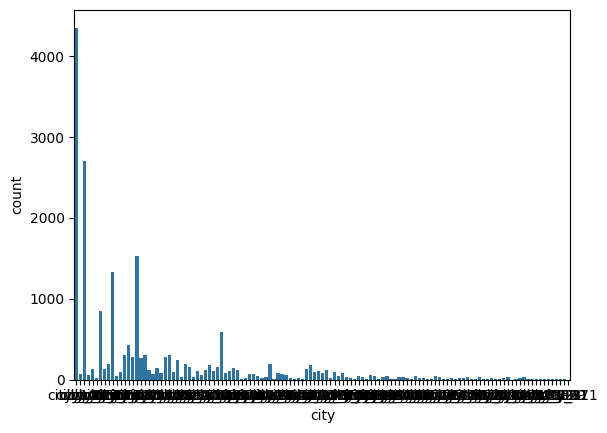

In [116]:
sns.countplot(x='city', data=df)
plt.show()

In [117]:
df['gender'].value_counts(dropna=False)

,count
gender,
Male,13221
NaN,4508
Female,1238
Other,191


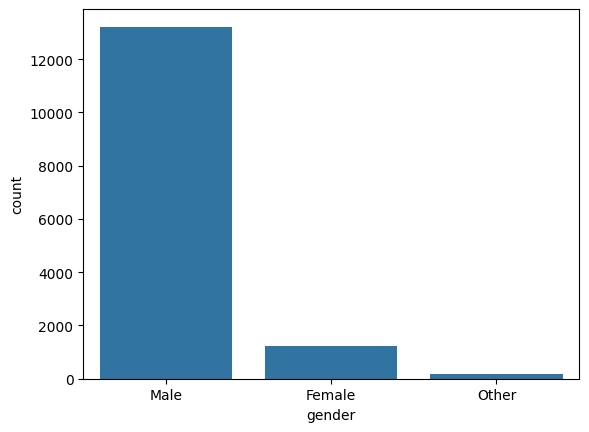

In [118]:
sns.countplot(x='gender',data=df)
plt.show()

In [119]:
df['relevent_experience'].value_counts(dropna=False)

,count
relevent_experience,
Has relevent experience,13792
No relevent experience,5366


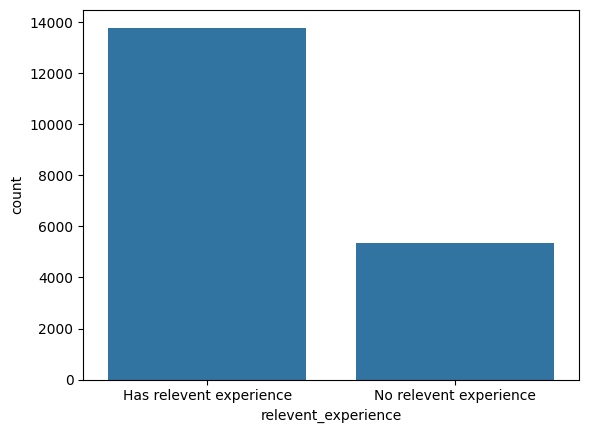

In [120]:
sns.countplot(x='relevent_experience', data=df)
plt.show()

In [121]:
df['enrolled_university'].value_counts(dropna=False)

,count
enrolled_university,
no_enrollment,13817
Full time course,3757
Part time course,1198
NaN,386


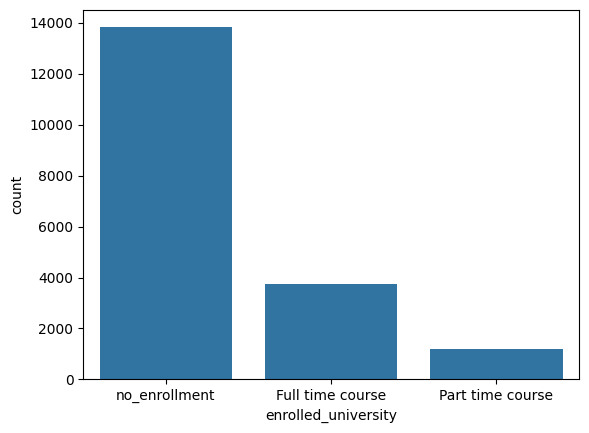

In [122]:
sns.countplot(x='enrolled_university', data=df)
plt.show()

In [123]:
df['education_level'].value_counts(dropna=False)

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
NaN,460
Phd,414
Primary School,308


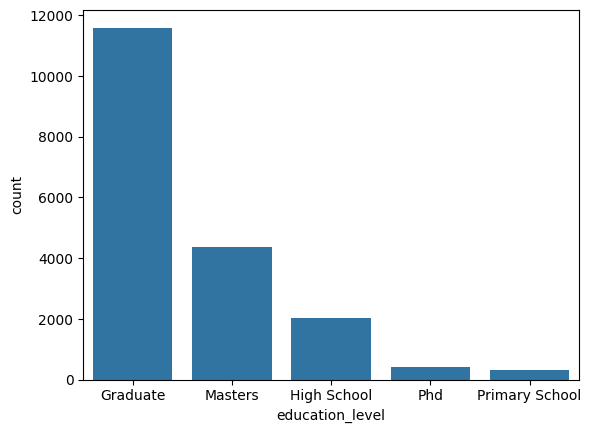

In [124]:
sns.countplot(x='education_level', data=df)
plt.show()

In [125]:
df['major_discipline'].value_counts(dropna=False)

,count
major_discipline,
STEM,14492
NaN,2813
Humanities,669
Other,381
Business Degree,327
Arts,253
No Major,223


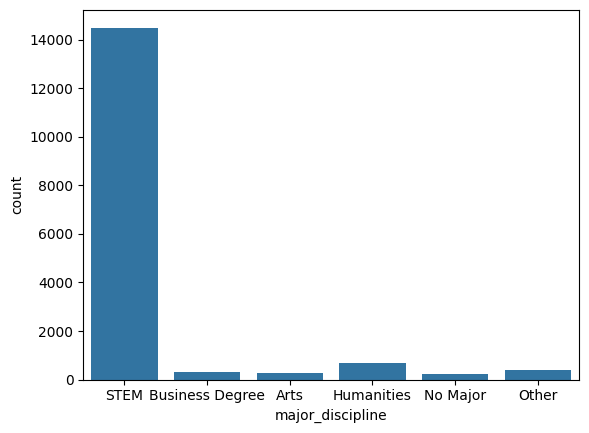

In [126]:
sns.countplot(x='major_discipline', data=df)
plt.show()

In [127]:
df['experience'].value_counts(dropna=False)

,count
experience,
>20,3286
5,1430
4,1403
3,1354
6,1216
2,1127
7,1028
10,985
9,980


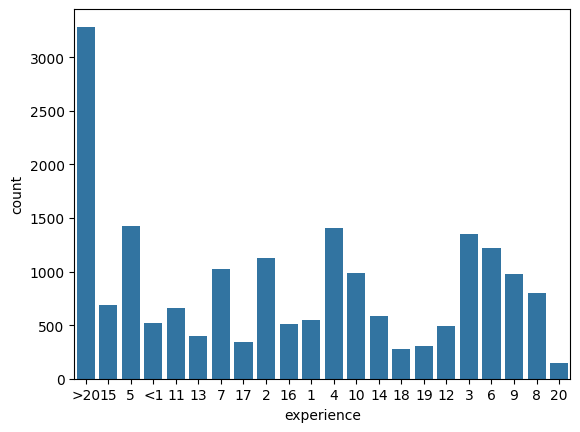

In [128]:
sns.countplot(x='experience', data=df)
plt.show()

In [129]:
df['company_size'].value_counts(dropna=False)

,count
company_size,
NaN,5938
50-99,3083
100-500,2571
10000+,2019
10/49,1471
1000-4999,1328
<10,1308
500-999,877
5000-9999,563


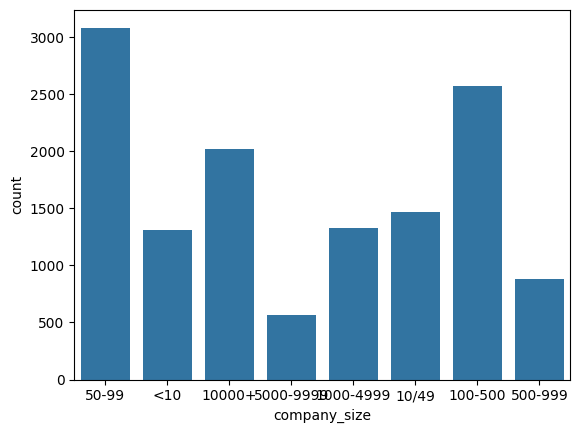

In [130]:
sns.countplot(x='company_size', data=df)
plt.show()

In [131]:
df['company_type'].value_counts(dropna=False)

,count
company_type,
Pvt Ltd,9817
NaN,6140
Funded Startup,1001
Public Sector,955
Early Stage Startup,603
NGO,521
Other,121


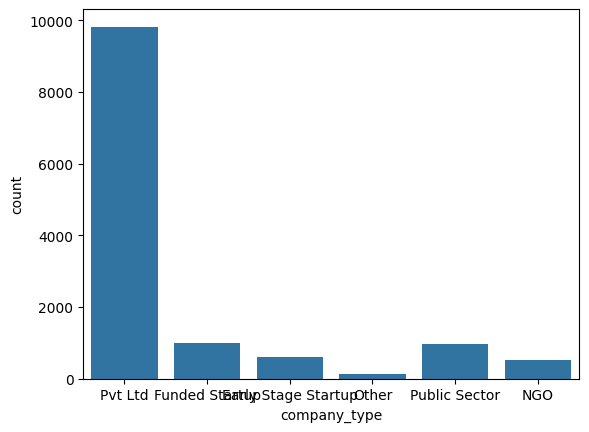

In [132]:
sns.countplot(x='company_type', data=df)
plt.show()

In [133]:
df['last_new_job'].value_counts(dropna=False)

,count
last_new_job,
1,8040
>4,3290
2,2900
never,2452
4,1029
3,1024
NaN,423


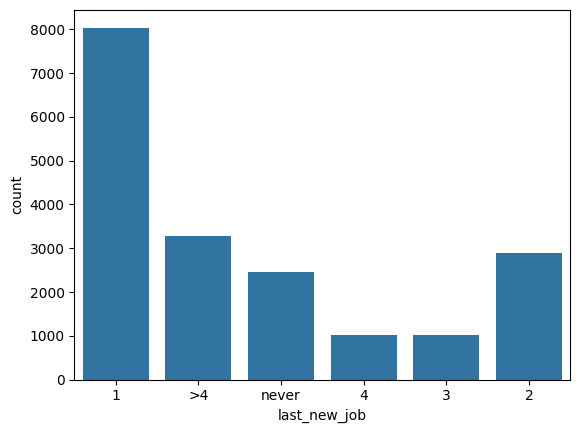

In [134]:
sns.countplot(x='last_new_job', data=df)
plt.show()

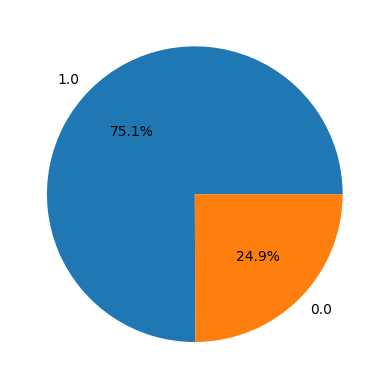

In [135]:
plt.pie(df['target'].value_counts(), labels=df['target'].unique(), autopct='%0.1f%%')
plt.show()

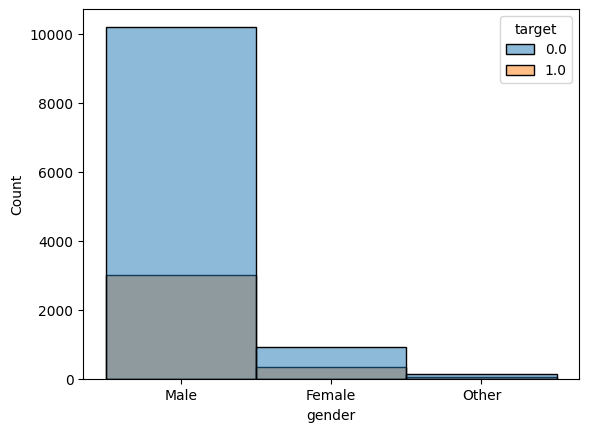

In [136]:
sns.histplot(x=df['gender'],hue=df['target'])
plt.show()